# Scraping of Youtube URLs from the website of the Oso Trava band

@roman
5 sep 2023

In [6]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import json

In [2]:
# params
API_KEY = os.environ["YOUTUBE_API_KEY"]
CHANNEL_ID = "UCWVspRnU4QdsR4Av4tDWWRw" # oso trava's youtube channel id

# build youtube api service
youtube = build('youtube', 'v3', developerKey=API_KEY)

# Get info about the Channel


In [8]:
def get_channel_stats(youtube, channel_id):
    """
    Returns a dictionary with the channel's statistics
    """
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channel_id
    )
    response = request.execute()
    return response

In [9]:
# get osotrava's channel statistics
channel_stats = get_channel_stats(youtube, CHANNEL_ID)

In [10]:
print(json.dumps(channel_stats, indent=4))

{
    "kind": "youtube#channelListResponse",
    "etag": "IXiuAMuYhWBV5AEnuDHZEnN8vr8",
    "pageInfo": {
        "totalResults": 1,
        "resultsPerPage": 5
    },
    "items": [
        {
            "kind": "youtube#channel",
            "etag": "U3XHdRz_eOOEVrzIuUPfxj31zVw",
            "id": "UCWVspRnU4QdsR4Av4tDWWRw",
            "snippet": {
                "title": "Oso Trava",
                "description": "Cracks es un podcast de entrevistas con enfoque en negocios y mentalidad que le ense\u00f1ara a cualquiera que aspire a la grandeza los h\u00e1bitos y trucos que usan los mejores en deportes, negocios, tecnolog\u00eda y medios para lograr el \u00e9xito.\n\nEl objetivo del podcast es motivar a la siguiente generaci\u00f3n de hispanos a vivir vidas con m\u00e1s impacto.\n\nEl podcast es presentado por Oso Trava, emprendedor y fundador de InstaFit, quien ha sido nombrado emprendedor del a\u00f1o por la revista Expansi\u00f3n en 2010 y 2018 e incluido entre las 30 promesas 

# Get all the playlists from the channel

In [12]:
# TODO: get all the videos of the channel iterating through the pages !!!
# function to retraive all the playlists of the channel
def get_channel_playlists(youtube, channel_id):
    """
    Returns a list of dictionaries with the channel's playlists
    """
    request = youtube.playlists().list(
        part="snippet,contentDetails",
        channelId=channel_id,
        maxResults=50
    )
    response = request.execute()
    return response

In [13]:
# get osotrava's channel playlists
channel_playlists = get_channel_playlists(youtube, CHANNEL_ID)
print(json.dumps(channel_playlists, indent=4))

{
    "kind": "youtube#playlistListResponse",
    "etag": "4ih3y7UWFxh4uYVifodJ-ikwdQM",
    "nextPageToken": "CDIQAA",
    "pageInfo": {
        "totalResults": 63,
        "resultsPerPage": 50
    },
    "items": [
        {
            "kind": "youtube#playlist",
            "etag": "BCVuoV-8q-jPZtr5qKk2CHRK4Gk",
            "id": "PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN",
            "snippet": {
                "publishedAt": "2023-06-26T03:11:15Z",
                "channelId": "UCWVspRnU4QdsR4Av4tDWWRw",
                "title": "CRACKS PODCAST",
                "description": "El mejor podcast de negocios en hablahispana. Un programa donde los m\u00e1s grande representante de su industria, deporte o ciencia exponen sus h\u00e1bitos, memorias y hacks",
                "thumbnails": {
                    "default": {
                        "url": "https://i.ytimg.com/vi/fL9FNpuGK_8/default.jpg",
                        "width": 120,
                        "height": 90
               

# Get all the videos of a playlist


In [16]:
# TODO: get all the videos of the channel iterating through the pages !!!
# function to retraive all the videos of a playlist
def get_playlist_videos(youtube, playlist_id):
    """
    Returns a list of dictionaries with the playlist's videos
    """
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()
    return response

In [17]:
# get osotrava's playlist videos
cracks_playlist = channel_playlists.get('items')[0].get('id')

# get cracks playlists' videos
cracks_videos = get_playlist_videos(youtube, cracks_playlist)

In [18]:
# print
print(json.dumps(cracks_videos, indent=4))

{
    "kind": "youtube#playlistItemListResponse",
    "etag": "L81_nOaqEW5aTvarIXV3UfeGtew",
    "items": [
        {
            "kind": "youtube#playlistItem",
            "etag": "XiX5UHFEHyvFqb_Rra2dcqXMipU",
            "id": "UEw1RURxby1YSW9EQ2c1elRucXAwczZtV01QeWV4N3VrTi45NDk1REZENzhEMzU5MDQz",
            "snippet": {
                "publishedAt": "2023-08-28T03:19:53Z",
                "channelId": "UCWVspRnU4QdsR4Av4tDWWRw",
                "title": "SUSO ZAMORA | Perder a TODA tu FAMILIA, lo que aprendes de LA MUERTE #242",
                "description": "Suso Zamora es un inversionista peruano fundador de Enfoca Inversiones, un fondo de m\u00e1s de 1,300 millones de d\u00f3lares y CEO de AUNA Salud una plataforma integrada de salud con presencia en M\u00e9xico, Colombia y Per\u00fa. \n\n\u201cCoger el momento, cogerlo, no se trata de agarrarlo, COGETELO, porque los momentos son \u00fanicos, son intensos y los tienes que poseer \u201d \u2013 Suso Zamora\n\nComparte esta fra

In [19]:
# open a video
video_id = cracks_videos.get('items')[0].get('contentDetails').get('videoId')

In [20]:
video_id

'fL9FNpuGK_8'

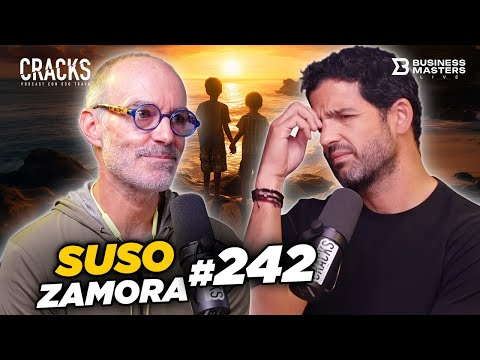

In [23]:
# open a video in youtube
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)